<a href="https://colab.research.google.com/github/gabrielluiz0710/inteligencia_computacional/blob/main/ic_trab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependências

In [ ]:
!pip install ucimlrepo
!pip install kagglehub[pandas-datasets]
!pip install -q kaggle

# RNA MLP - Região do Vinho Tinto

**DATASET WINE**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from ucimlrepo import fetch_ucirepo

# Carrega o dataset
wine = fetch_ucirepo(id=109)

# Dados (armazenados como dataframes do pandas)
X = wine.data.features
y = wine.data.targets

# Normaliza os dados para o intervalo [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Definir proporções
train_size = 0.70
test_size = 0.23
val_size = 0.07

# Primeiro, divide entre treino (70%) e o restante (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=(1 - train_size), random_state=None)

# Depois, divide o restante entre teste (23%) e validação (7%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=(val_size / (test_size + val_size)), random_state=None)
# Função para criar e treinar a MLP
def train_mlp(hidden_layer_sizes, X_train, y_train, X_val, y_val, epochs=5000, learning_rate=0.01):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                        activation='logistic',
                        solver='sgd',
                        learning_rate_init=learning_rate,
                        max_iter=epochs,
                        random_state=42)
    mlp.fit(X_train, y_train.values.ravel())

    # Previsões
    y_pred = mlp.predict(X_val)

    # Métricas
    mse = mean_squared_error(y_val, y_pred)

    mape = mean_absolute_percentage_error(y_val, y_pred)

    cv = np.std(y_pred) / np.mean(y_pred)


    return mlp,mse, mape, cv

# Arquiteturas a serem testadas
architectures = [
    (13),  # 3 camadas
    (13, 13),  # 4 camadas
    (13, 13, 13)  # 5 camadas
]

# Parâmetros
epochs = 500
learning_rate = 0.01

# Testando as arquiteturas
results = {}
for arch in architectures:
    print(f"Treinando arquitetura: {arch}")
    mlp, mse, mape, cv = train_mlp(
        arch, X_train, y_train, X_val, y_val, epochs, learning_rate)

    results[arch] = {
        'MSE': mse,
        'MAPE': mape,
        'CV': cv
    }

# Exibe os resultados
for arch, metrics in results.items():
    print(f"\nArquitetura: {arch}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Testando com os dados de teste
print("\nTestando com os dados de teste:")
best_arch = min(results, key=lambda k: results[k]['MSE'])
print(f"Melhor arquitetura: {best_arch}")

mlp, _, _, _ = train_mlp(best_arch, X_train, y_train, X_val, y_val, epochs, learning_rate)
y_test_pred = mlp.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
cv_test = np.std(y_test_pred) / np.mean(y_test_pred)

print(f"MSE Teste: {mse_test:.4f}")
print(f"MAPE Teste: {mape_test:.4f}")
print(f"CV Teste: {cv_test:.4f}")

# Realizando 20 testes para cada amostra de teste
print("\nRealizando 20 testes para cada amostra de teste:")
for i in range(len(X_val)):
    print(f"\nAmostra {i+1}:")
    for j in range(20):
        y_pred = mlp.predict([X_val[i]])
        print(f"Teste {j+1}: Predição = {y_pred[0]}, Real = {y_val.iloc[i].values[0]}")

Treinando arquitetura: 13
Treinando arquitetura: (13, 13)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Treinando arquitetura: (13, 13, 13)

Arquitetura: 13
MSE: 0.0000
MAPE: 0.0000
CV: 0.2621

Arquitetura: (13, 13)
MSE: 0.5385
MAPE: 0.2308
CV: 0.0000

Arquitetura: (13, 13, 13)
MSE: 0.5385
MAPE: 0.2308
CV: 0.0000

Testando com os dados de teste:
Melhor arquitetura: 13
MSE Teste: 0.0244
MAPE Teste: 0.0122
CV Teste: 0.4547

Realizando 20 testes para cada amostra de teste:

Amostra 1:
Teste 1: Predição = 1, Real = 1
Teste 2: Predição = 1, Real = 1
Teste 3: Predição = 1, Real = 1
Teste 4: Predição = 1, Real = 1
Teste 5: Predição = 1, Real = 1
Teste 6: Predição = 1, Real = 1
Teste 7: Predição = 1, Real = 1
Teste 8: Predição = 1, Real = 1
Teste 9: Predição = 1, Real = 1
Teste 10: Predição = 1, Real = 1
Teste 11: Predição = 1, Real = 1
Teste 12: Predição = 1, Real = 1
Teste 13: Predição = 1, Real = 1
Teste 14: Predição = 1, Real = 1
Teste 15: Predição = 1, Real = 1
Teste 16: Predição = 1, Real = 1
Teste 17: Predição = 1, Real = 1
Teste 18: Predição = 1, Real = 1
Teste 19: Predição = 1, Real = 1

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# RNA MLP - Espécie de Flor Íris

**DATASET IRIS**

Primeiras 5 linhas das features:
   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977
Últimas 5 linhas das features:
     sepal_length  sepal_width  petal_length  petal_width
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591
Primeiras 5 linhas dos targets:
   class
0      0
1      0
2      0
3      0
4      0
Últimas 5 linhas dos targets:
     class
145      2
146      2
147      2
148      2
149      2


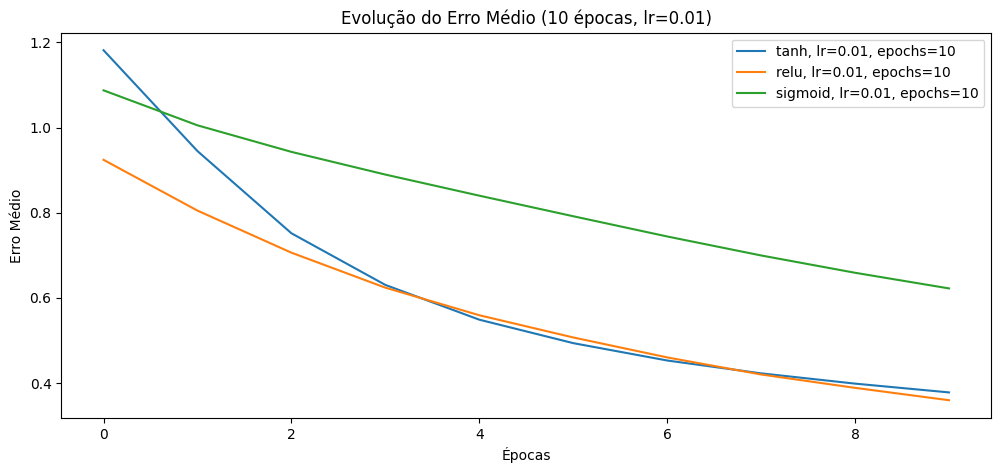

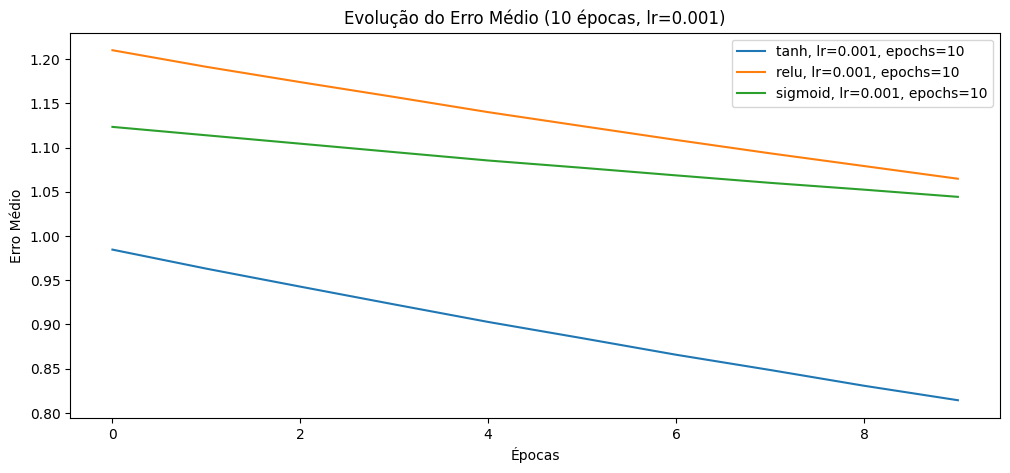

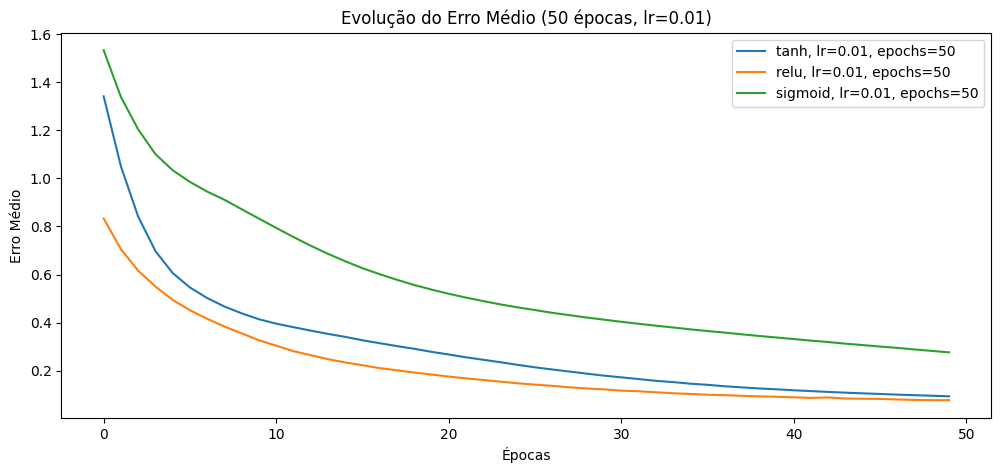

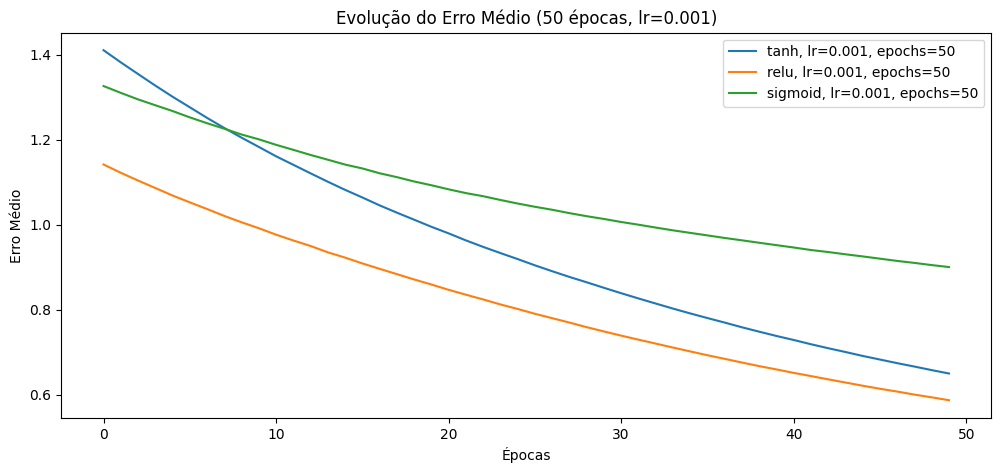

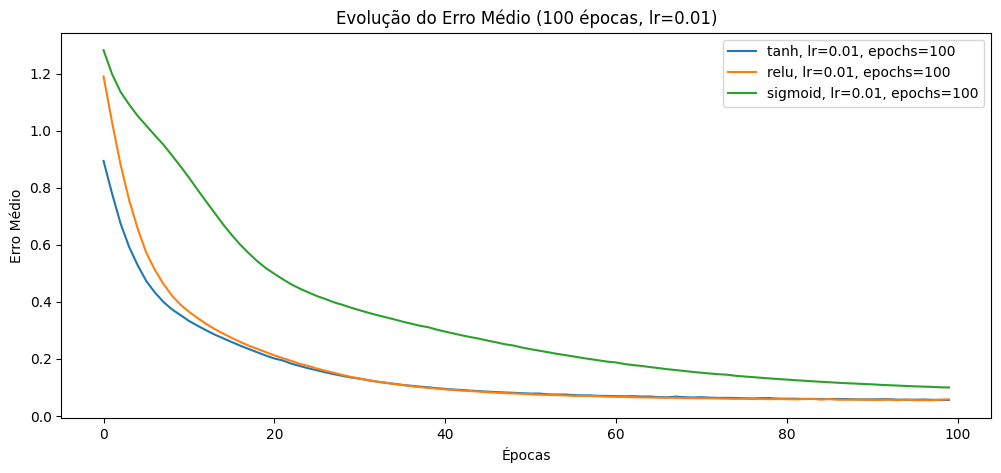

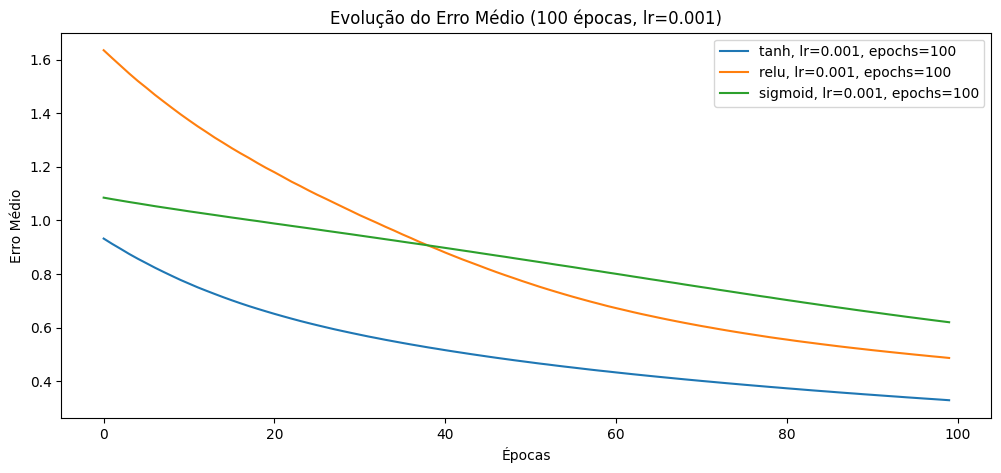

   Activation  Learning Rate  Epochs  Accuracy
0        tanh          0.010      10  0.933333
1        tanh          0.010      50  1.000000
2        tanh          0.010     100  1.000000
3        tanh          0.001      10  0.466667
4        tanh          0.001      50  0.900000
5        tanh          0.001     100  0.966667
6        relu          0.010      10  0.900000
7        relu          0.010      50  0.966667
8        relu          0.010     100  1.000000
9        relu          0.001      10  0.533333
10       relu          0.001      50  0.833333
11       relu          0.001     100  0.866667
12    sigmoid          0.010      10  0.866667
13    sigmoid          0.010      50  0.966667
14    sigmoid          0.010     100  1.000000
15    sigmoid          0.001      10  0.600000
16    sigmoid          0.001      50  0.900000
17    sigmoid          0.001     100  0.933333


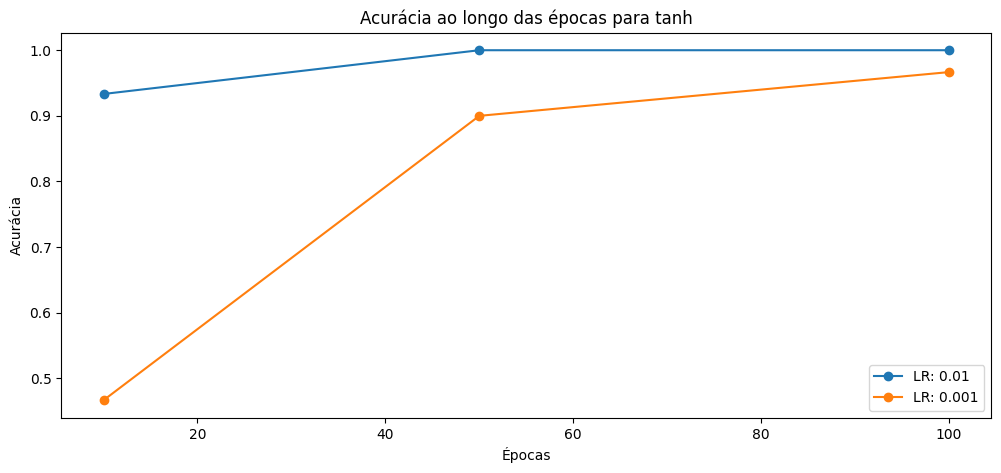

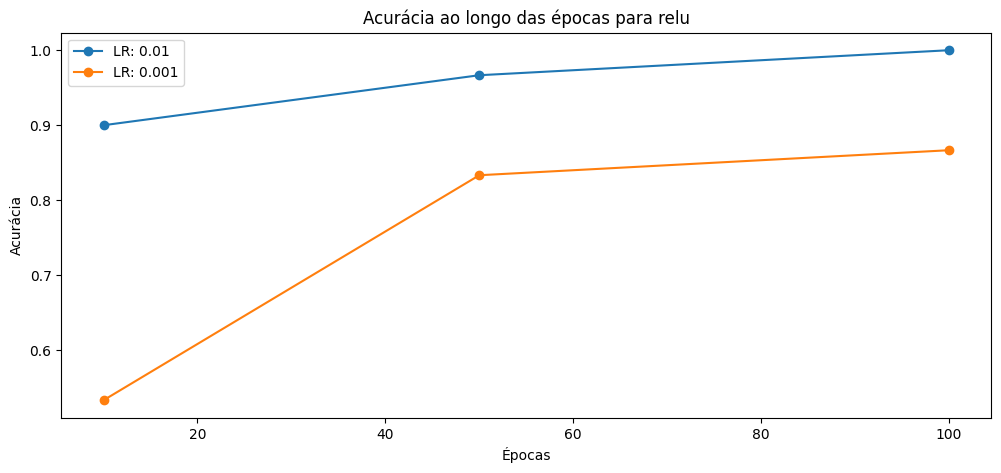

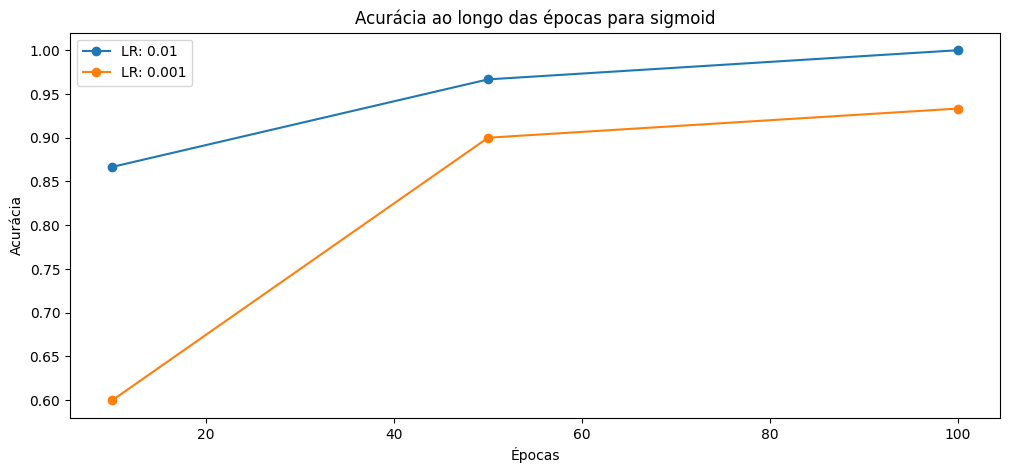

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

def load_data(print_samples=False):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
    df = pd.read_csv(url, names=col_names)

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=col_names[:-1])

    if print_samples:
        print("Primeiras 5 linhas das features:")
        print(X.head())
        print("Últimas 5 linhas das features:")
        print(X.tail())
        print("Primeiras 5 linhas dos targets:")
        print(pd.DataFrame(y, columns=['class']).head())
        print("Últimas 5 linhas dos targets:")
        print(pd.DataFrame(y, columns=['class']).tail())

    return train_test_split(X.values, y, test_size=0.2, random_state=42)

def build_model(input_dim, hidden_layers=[8], activation='tanh', learning_rate=0.01):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    for units in hidden_layers:
        model.add(Dense(units, activation=activation))

    model.add(Dense(3, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

def train_model(model, X_train, y_train, X_test, y_test, epochs=50):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0)
    return history

def evaluate_models():
    activations = ['tanh', 'relu', 'sigmoid']
    learning_rates = [0.01, 0.001]
    epochs_list = [10, 50, 100]

    results = []
    X_train, X_test, y_train, y_test = load_data(print_samples=True)

    for activation in activations:
        for lr in learning_rates:
            for epochs in epochs_list:
                model = build_model(X_train.shape[1], [8], activation, lr)
                history = train_model(model, X_train, y_train, X_test, y_test, epochs)
                loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                results.append((activation, lr, epochs, accuracy, history.history['loss']))

    return results

def plot_results(results):
    epochs_list = [10, 50, 100]
    learning_rates = [0.01, 0.001]

    for epochs in epochs_list:
        for lr in learning_rates:
            plt.figure(figsize=(12, 5))
            for activation, lr_val, ep, accuracy, loss in results:
                if ep == epochs and lr_val == lr:
                    plt.plot(range(len(loss)), loss, label=f'{activation}, lr={lr}, epochs={ep}')
            plt.xlabel('Épocas')
            plt.ylabel('Erro Médio')
            plt.title(f'Evolução do Erro Médio ({epochs} épocas, lr={lr})')
            plt.legend()
            plt.show()

    df_results = pd.DataFrame(results, columns=['Activation', 'Learning Rate', 'Epochs', 'Accuracy', 'Loss'])
    print(df_results[['Activation', 'Learning Rate', 'Epochs', 'Accuracy']])

    for activation in df_results['Activation'].unique():
        plt.figure(figsize=(12, 5))
        for lr in df_results['Learning Rate'].unique():
            subset = df_results[(df_results['Activation'] == activation) & (df_results['Learning Rate'] == lr)]
            plt.plot(subset['Epochs'], subset['Accuracy'], marker='o', label=f'LR: {lr}')
        plt.xlabel('Épocas')
        plt.ylabel('Acurácia')
        plt.title(f'Acurácia ao longo das épocas para {activation}')
        plt.legend()
        plt.show()

results = evaluate_models()
plot_results(results)


# RNA MLP - Autismo em Crianças e Adolescentes

**DATASET AUTISTIC**

Distribuição das Classes:
Class/ASD
b'YES'    204
b'NO'     192
Name: count, dtype: int64
Métricas de Treinamento:
Acurácia: 0.9306, Precisão: 0.9306, Sensibilidade: 0.9306, F1-Score: 0.9306

Métricas de Validação:
Acurácia: 0.9500, Precisão: 0.9375, Sensibilidade: 0.9677, F1-Score: 0.9524

Métricas de Teste:
Acurácia: 0.9322, Precisão: 0.9032, Sensibilidade: 0.9655, F1-Score: 0.9333

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.90      0.97      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



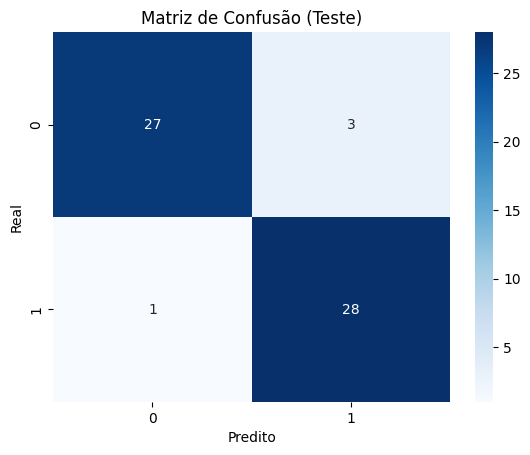

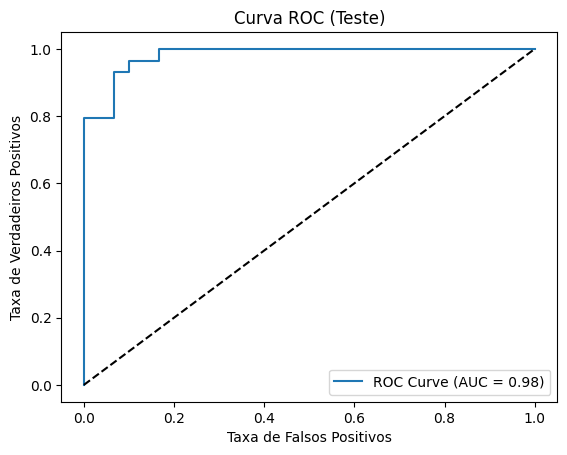

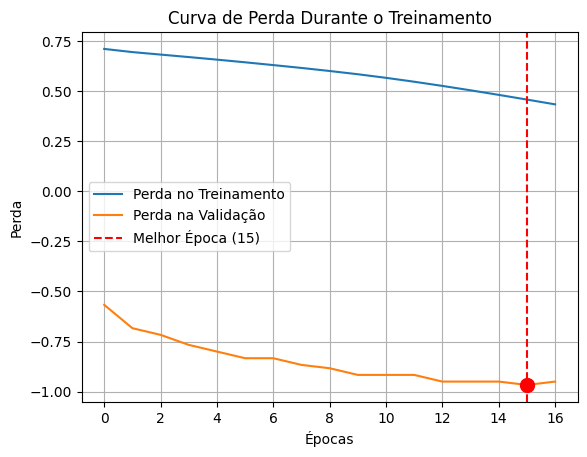

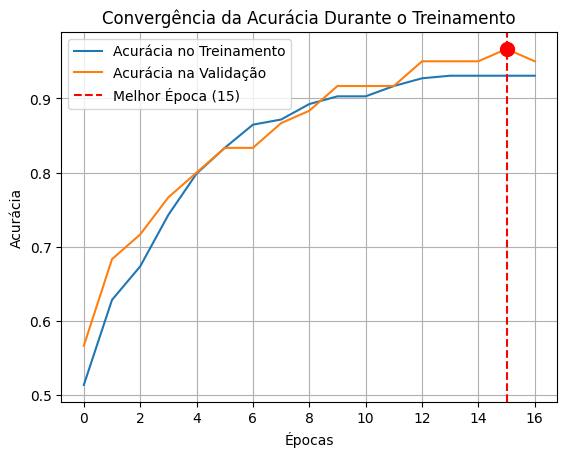

In [ ]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Passo 1: Carregar e unir os datasets
def load_and_combine_datasets(child_path, adolescent_path):
    child_data = loadarff(child_path)
    adolescent_data = loadarff(adolescent_path)
    df_child = pd.DataFrame(child_data[0])
    df_adolescent = pd.DataFrame(adolescent_data[0])
    df = pd.concat([df_child, df_adolescent], ignore_index=True)
    return df

# Passo 2: Pré-processamento dos dados
def preprocess_data(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    X = df.drop('Class/ASD', axis=1)
    y = df['Class/ASD']

    imputer = SimpleImputer(strategy='most_frequent')
    X = imputer.fit_transform(X)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    return X, y, label_encoders, scaler, imputer

# Passo 3: Dividir o dataset
def split_dataset(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Passo 4: Implementar e treinar a MLP
def train_mlp(X_train, y_train, X_val, y_val):
    mlp = MLPClassifier(
        hidden_layer_sizes=(100, 50, 25),  # Três camadas ocultas
        activation='relu',
        solver='adam',
        alpha=0.01,  # Regularização L2
        max_iter=1,  # Treinar uma época por vez
        random_state=42,
        early_stopping=False  # Desativar early_stopping para partial_fit
    )

    # Listas para armazenar métricas ao longo das épocas
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []

    # Treinamento manual para capturar métricas por época
    n_epochs = 1000  # Número máximo de épocas
    for epoch in range(n_epochs):
        mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))

        # Calcular perda e acurácia no treinamento
        train_loss.append(mlp.loss_)
        train_acc.append(accuracy_score(y_train, mlp.predict(X_train)))

        # Calcular perda e acurácia na validação
        val_loss.append(-mlp.score(X_val, y_val))  # score retorna acurácia, usamos negativo para "perda"
        val_acc.append(accuracy_score(y_val, mlp.predict(X_val)))

        # Parar se a perda na validação não melhorar por 10 épocas consecutivas
        if epoch > 10 and val_loss[-1] > val_loss[-2]:
            break

    return mlp, train_loss, val_loss, train_acc, val_acc

# Passo 5: Avaliar o modelo e gerar gráficos
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, train_loss, val_loss, train_acc, val_acc):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    def calculate_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        return accuracy, precision, recall, f1

    train_metrics = calculate_metrics(y_train, y_train_pred)
    val_metrics = calculate_metrics(y_val, y_val_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    print("Métricas de Treinamento:")
    print(f"Acurácia: {train_metrics[0]:.4f}, Precisão: {train_metrics[1]:.4f}, Sensibilidade: {train_metrics[2]:.4f}, F1-Score: {train_metrics[3]:.4f}")
    print("\nMétricas de Validação:")
    print(f"Acurácia: {val_metrics[0]:.4f}, Precisão: {val_metrics[1]:.4f}, Sensibilidade: {val_metrics[2]:.4f}, F1-Score: {val_metrics[3]:.4f}")
    print("\nMétricas de Teste:")
    print(f"Acurácia: {test_metrics[0]:.4f}, Precisão: {test_metrics[1]:.4f}, Sensibilidade: {test_metrics[2]:.4f}, F1-Score: {test_metrics[3]:.4f}")

    print("\nRelatório de Classificação (Teste):")
    print(classification_report(y_test, y_test_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusão (Teste)")
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    # Curva ROC
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("Curva ROC (Teste)")
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.legend()
    plt.show()

    # Gráfico de Perdas
    plt.plot(train_loss, label='Perda no Treinamento')
    plt.plot(val_loss, label='Perda na Validação')
    best_epoch = np.argmin(val_loss)
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Melhor Época ({best_epoch})')
    plt.scatter(best_epoch, val_loss[best_epoch], color='red', s=100, zorder=5)
    plt.title('Curva de Perda Durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.grid()
    plt.show()

    # Gráfico de Acurácia
    plt.plot(train_acc, label='Acurácia no Treinamento')
    plt.plot(val_acc, label='Acurácia na Validação')
    best_epoch_acc = np.argmax(val_acc)
    plt.axvline(x=best_epoch_acc, color='r', linestyle='--', label=f'Melhor Época ({best_epoch_acc})')
    plt.scatter(best_epoch_acc, val_acc[best_epoch_acc], color='red', s=100, zorder=5)
    plt.title('Convergência da Acurácia Durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

# Caminhos dos datasets
child_path = '/content/Autism-Child-Data.arff'
adolescent_path = '/content/Autism-Adolescent-Data.arff'

# Passo 1: Carregar e unir os datasets
df = load_and_combine_datasets(child_path, adolescent_path)

# Verificar distribuição das classes
print("Distribuição das Classes:")
print(df['Class/ASD'].value_counts())

# Passo 2: Pré-processamento dos dados
X, y, label_encoders, scaler, imputer = preprocess_data(df)

# Passo 3: Dividir o dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Passo 4: Treinar a MLP
mlp, train_loss, val_loss, train_acc, val_acc = train_mlp(X_train_res, y_train_res, X_val, y_val)

# Passo 5: Avaliar o modelo e gerar gráficos
evaluate_model(mlp, X_train_res, X_val, X_test, y_train_res, y_val, y_test, train_loss, val_loss, train_acc, val_acc)

In [ ]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Passo 1: Carregar e unir os datasets
def load_and_combine_datasets(child_path, adolescent_path):
    child_data = loadarff(child_path)
    adolescent_data = loadarff(adolescent_path)
    df_child = pd.DataFrame(child_data[0])
    df_adolescent = pd.DataFrame(adolescent_data[0])
    df = pd.concat([df_child, df_adolescent], ignore_index=True)
    return df

# Passo 2: Pré-processamento dos dados
def preprocess_data(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    X = df.drop('Class/ASD', axis=1)
    y = df['Class/ASD']

    imputer = SimpleImputer(strategy='most_frequent')
    X = imputer.fit_transform(X)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    return X, y, label_encoders, scaler, imputer

# Passo 3: Dividir o dataset
def split_dataset(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Passo 4: Implementar e treinar a MLP
def train_mlp(X_train, y_train, X_val, y_val):
    mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='tanh',
    solver='sgd',
    alpha=0.01,
    max_iter=1,
    random_state=42,
    early_stopping=False,
    momentum=0.9,  # Adicionado momentum
    learning_rate_init=0.01,  # Taxa de aprendizado menor
    learning_rate='adaptive'  # Ajuste dinâmico da taxa de aprendizado
    )


    # Listas para armazenar métricas ao longo das épocas
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []

    # Treinamento manual para capturar métricas por época
    n_epochs = 1000  # Número máximo de épocas
    for epoch in range(n_epochs):
        mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))

        # Calcular perda e acurácia no treinamento
        train_loss.append(mlp.loss_)
        train_acc.append(accuracy_score(y_train, mlp.predict(X_train)))

        # Calcular perda e acurácia na validação
        val_loss.append(-mlp.score(X_val, y_val))  # score retorna acurácia, usamos negativo para "perda"
        val_acc.append(accuracy_score(y_val, mlp.predict(X_val)))

        # Parar se a perda na validação não melhorar por 10 épocas consecutivas
        if epoch > 10 and val_loss[-1] > val_loss[-2]:
            break

    return mlp, train_loss, val_loss, train_acc, val_acc

# Passo 5: Avaliar o modelo e gerar gráficos
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, train_loss, val_loss, train_acc, val_acc):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    def calculate_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        return accuracy, precision, recall, f1

    train_metrics = calculate_metrics(y_train, y_train_pred)
    val_metrics = calculate_metrics(y_val, y_val_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    print("Métricas de Treinamento:")
    print(f"Acurácia: {train_metrics[0]:.4f}, Precisão: {train_metrics[1]:.4f}, Sensibilidade: {train_metrics[2]:.4f}, F1-Score: {train_metrics[3]:.4f}")
    print("\nMétricas de Validação:")
    print(f"Acurácia: {val_metrics[0]:.4f}, Precisão: {val_metrics[1]:.4f}, Sensibilidade: {val_metrics[2]:.4f}, F1-Score: {val_metrics[3]:.4f}")
    print("\nMétricas de Teste:")
    print(f"Acurácia: {test_metrics[0]:.4f}, Precisão: {test_metrics[1]:.4f}, Sensibilidade: {test_metrics[2]:.4f}, F1-Score: {test_metrics[3]:.4f}")

    print("\nRelatório de Classificação (Teste):")
    print(classification_report(y_test, y_test_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusão (Teste)")
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    # Curva ROC
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("Curva ROC (Teste)")
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.legend()
    plt.show()

    # Gráfico de Perdas
    plt.plot(train_loss, label='Perda no Treinamento')
    plt.plot(val_loss, label='Perda na Validação')
    best_epoch = np.argmin(val_loss)
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Melhor Época ({best_epoch})')
    plt.scatter(best_epoch, val_loss[best_epoch], color='red', s=100, zorder=5)
    plt.title('Curva de Perda Durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.grid()
    plt.show()

    # Gráfico de Acurácia
    plt.plot(train_acc, label='Acurácia no Treinamento')
    plt.plot(val_acc, label='Acurácia na Validação')
    best_epoch_acc = np.argmax(val_acc)
    plt.axvline(x=best_epoch_acc, color='r', linestyle='--', label=f'Melhor Época ({best_epoch_acc})')
    plt.scatter(best_epoch_acc, val_acc[best_epoch_acc], color='red', s=100, zorder=5)
    plt.title('Convergência da Acurácia Durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()
    plt.show()

# Caminhos dos datasets
child_path = '/content/Autism-Child-Data.arff'
adolescent_path = '/content/Autism-Adolescent-Data.arff'

# Passo 1: Carregar e unir os datasets
df = load_and_combine_datasets(child_path, adolescent_path)

# Verificar distribuição das classes
print("Distribuição das Classes:")
print(df['Class/ASD'].value_counts())

# Passo 2: Pré-processamento dos dados
X, y, label_encoders, scaler, imputer = preprocess_data(df)

# Passo 3: Dividir o dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Passo 4: Treinar a MLP
mlp, train_loss, val_loss, train_acc, val_acc = train_mlp(X_train_res, y_train_res, X_val, y_val)

# Passo 5: Avaliar o modelo e gerar gráficos
evaluate_model(mlp, X_train_res, X_val, X_test, y_train_res, y_val, y_test, train_loss, val_loss, train_acc, val_acc)

# RNA MLP - Valor do Ouro

**DATASET OURO**

## VERSAO ARTIGO

<ipython-input-2-f39bef5baf62>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)


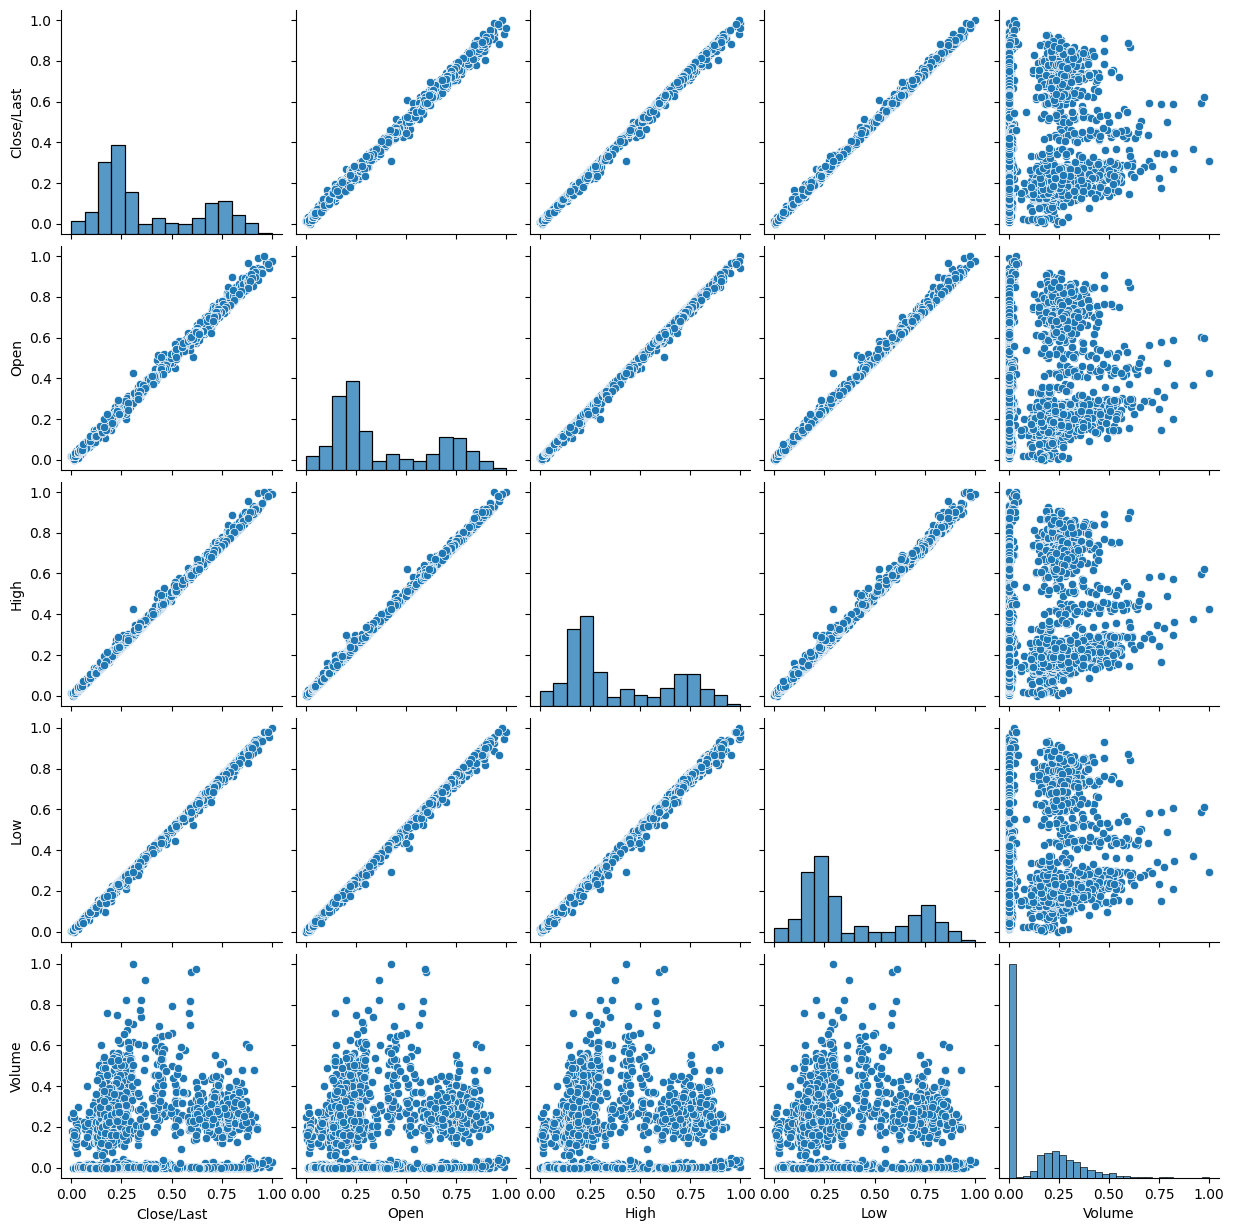

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
    Métrica     Valor
0       MSE  0.000036
1       MAE  0.004432
2  R² Score  0.997873


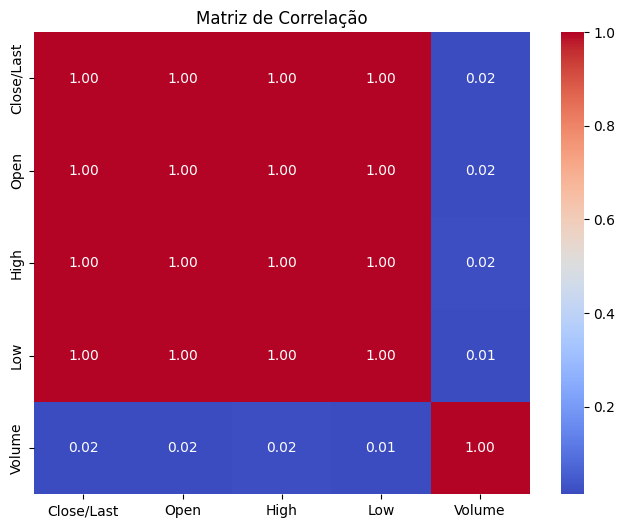

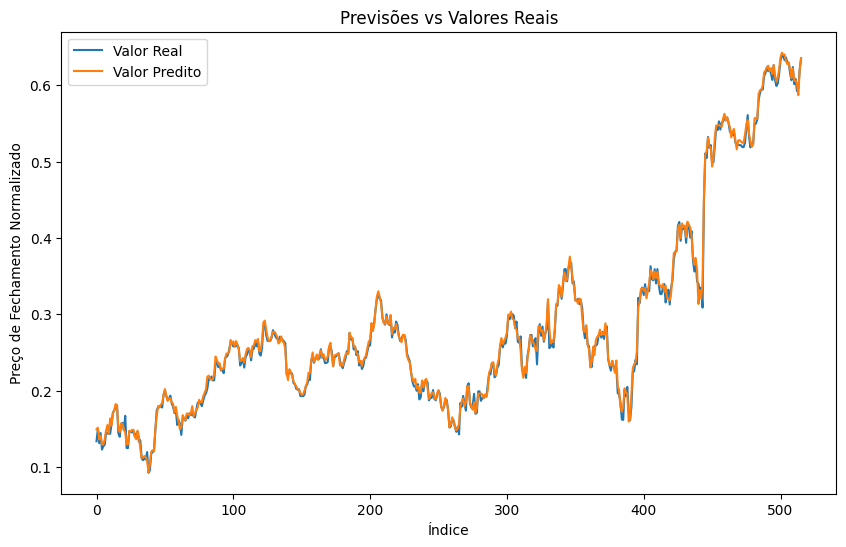

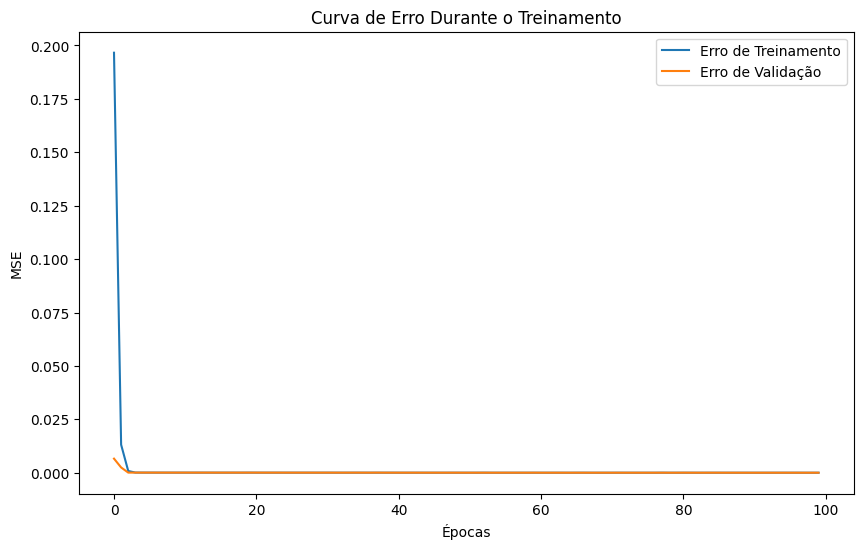

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU


# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

# Criar o pairplot
sns.pairplot(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])
plt.show()

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar o modelo MLP
model = Sequential([
    Dense(40, input_dim=4),
    LeakyReLU(alpha=0.01),
    Dense(40),
    LeakyReLU(alpha=0.01),
    Dense(40),
    LeakyReLU(alpha=0.01),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)

# Previsões
y_pred = model.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados em tabela
df_results = pd.DataFrame({
    'Métrica': ['MSE', 'MAE', 'R² Score'],
    'Valor': [mse, mae, r2]
})
print(df_results)

# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Gráfico de valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Valor Predito')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

# Curva de erro durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Salvar o modelo
model.save("mlp_gold_price_model.h5")


## Função de Ativação - Tangente Hiperbólica

<ipython-input-5-72d8826d11be>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    Métrica     Valor
0       MSE  0.000035
1       MAE  0.004247
2  R² Score  0.997955


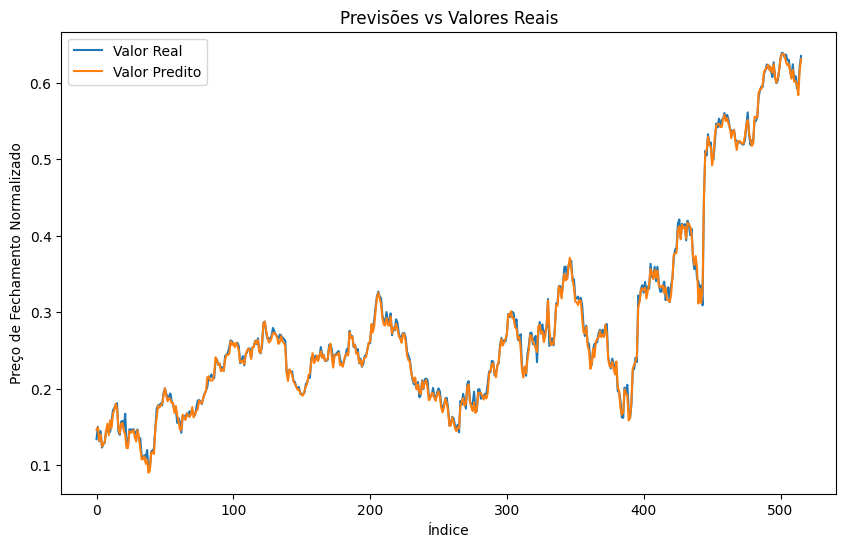

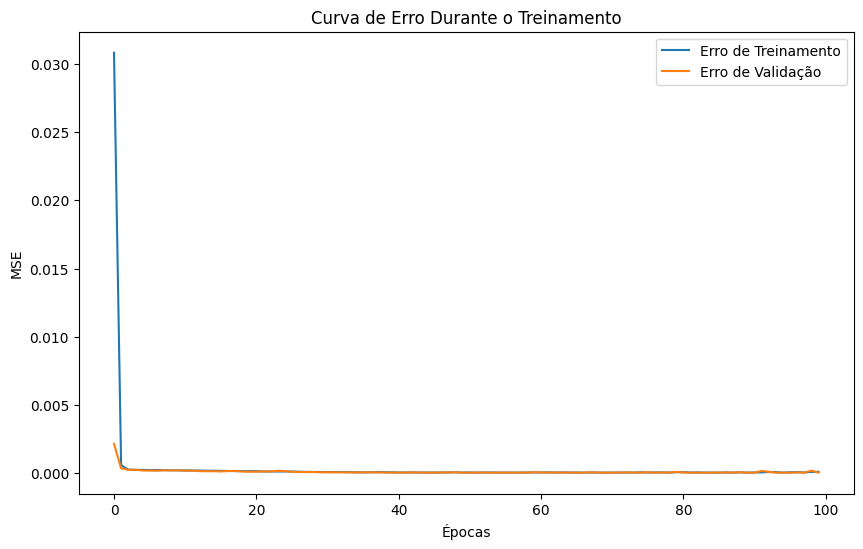

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar o modelo MLP com ativação tanh
model = Sequential([
    Dense(40, input_dim=4, activation='tanh'),
    Dense(40, activation='tanh'),
    Dense(40, activation='tanh'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)

# Previsões
y_pred = model.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados em tabela
df_results = pd.DataFrame({
    'Métrica': ['MSE', 'MAE', 'R² Score'],
    'Valor': [mse, mae, r2]
})
print(df_results)

# Gráfico de valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Valor Predito')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

# Curva de erro durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Salvar o modelo
model.save("mlp_gold_price_model.h5")


## Funçao de Ativação - Sigmoide

<ipython-input-7-b04fd85743e9>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    Métrica     Valor
0       MSE  0.000093
1       MAE  0.006805
2  R² Score  0.994543


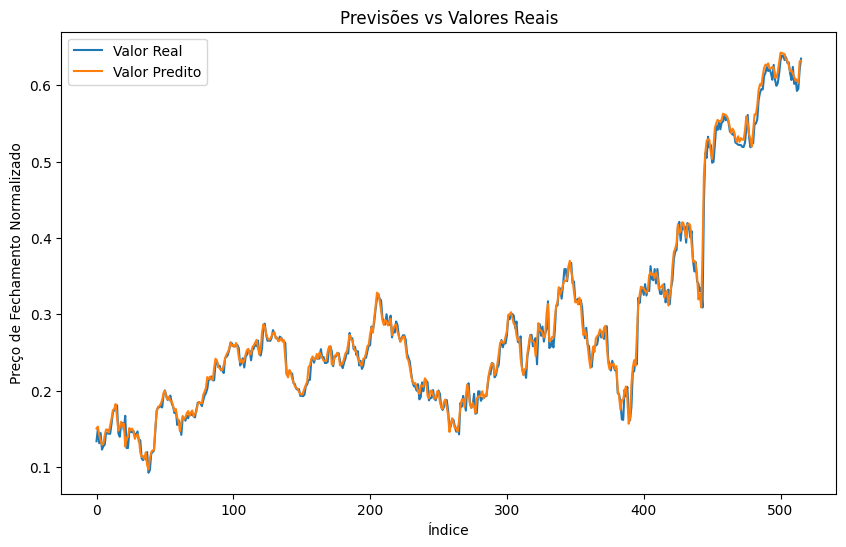

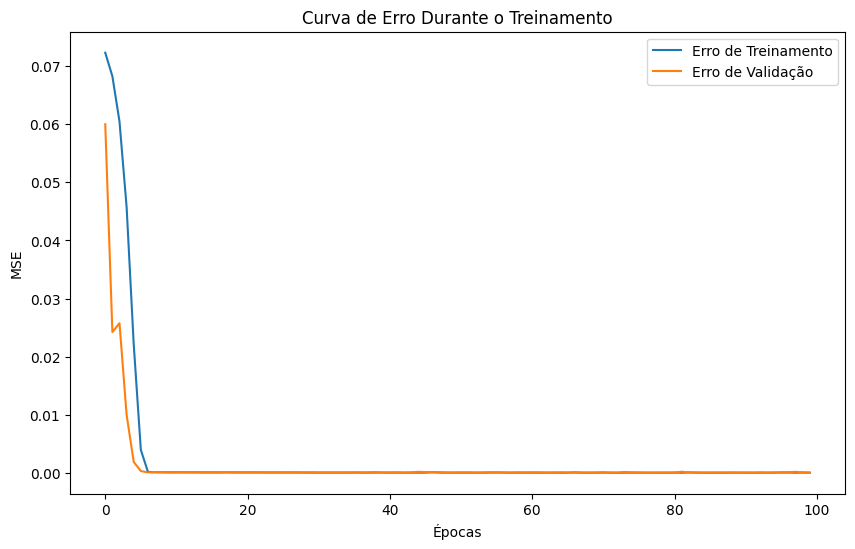

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar o modelo MLP com ativação sigmoid
model = Sequential([
    Dense(40, input_dim=4, activation='sigmoid'),
    Dense(40, activation='sigmoid'),
    Dense(40, activation='sigmoid'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)

# Previsões
y_pred = model.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados em tabela
df_results = pd.DataFrame({
    'Métrica': ['MSE', 'MAE', 'R² Score'],
    'Valor': [mse, mae, r2]
})
print(df_results)

# Gráfico de valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Valor Predito')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

# Curva de erro durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Salvar o modelo
model.save("mlp_gold_price_model.h5")


A que apresentou os melhores resultados foi o código que utiliza a Função de Ativação **Tangente Hiperbólica**.

Vamos testar agora aumentar a quantidade de neurônios nas camadas ocultas e a quantidade de camadas ocultas.

## Camadas Ocultas e Neurônios

<ipython-input-8-aac02f48fec6>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testando com 80 neurônios em 3 camadas ocultas
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    Métrica     Valor
0       MSE  0.000031
1       MAE  0.003975
2  R² Score  0.998198


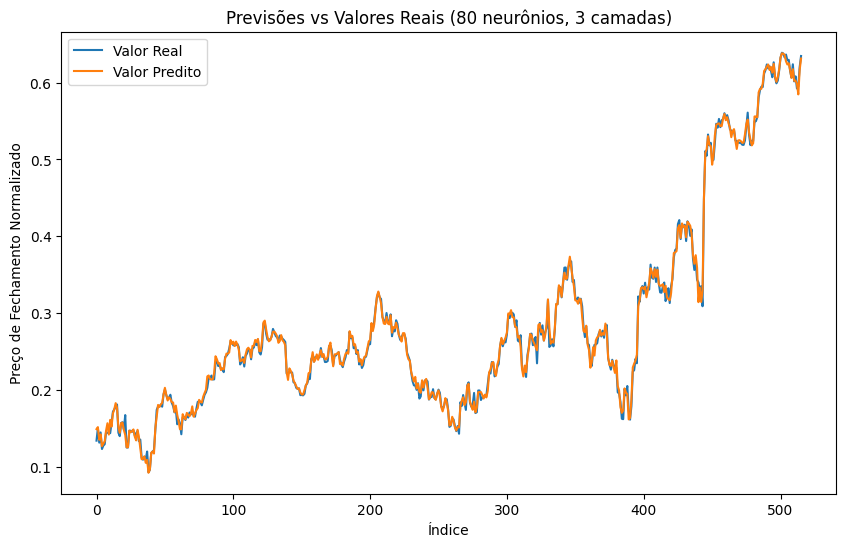

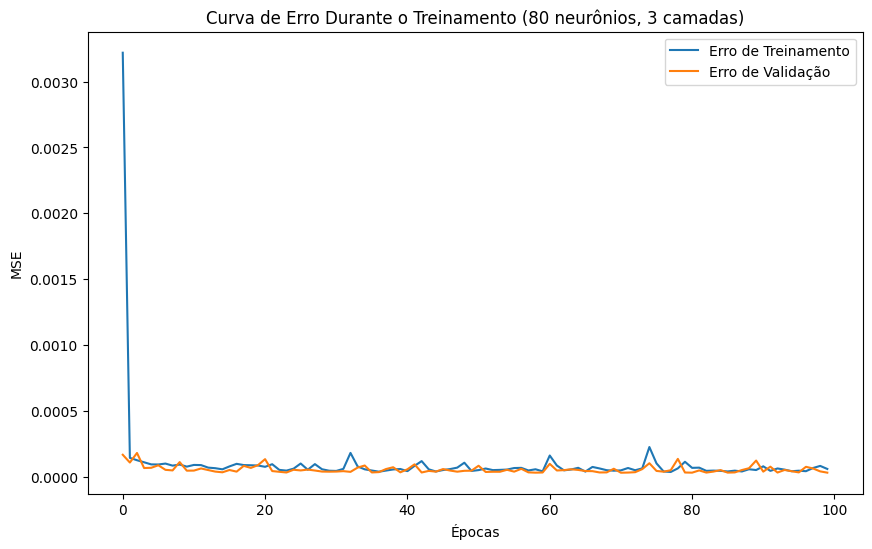

Testando com 20 neurônios em 5 camadas ocultas


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
    Métrica     Valor
0       MSE  0.000039
1       MAE  0.004553
2  R² Score  0.997687


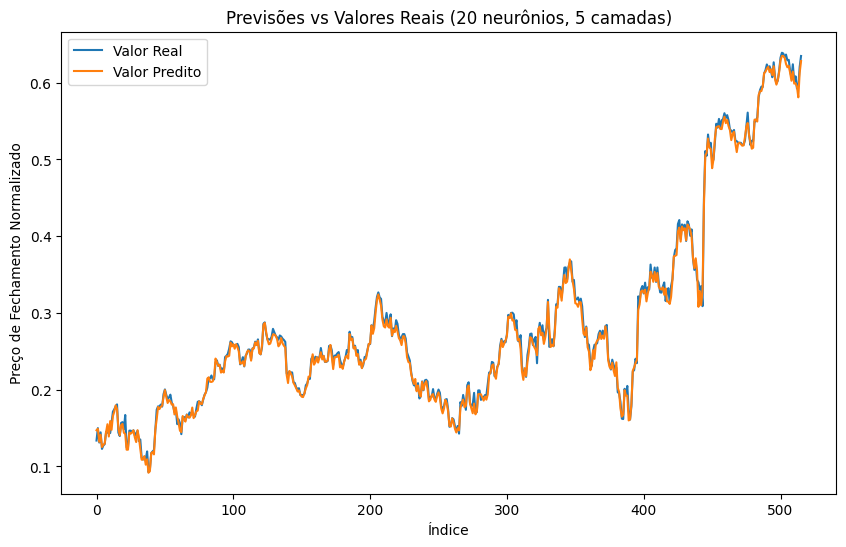

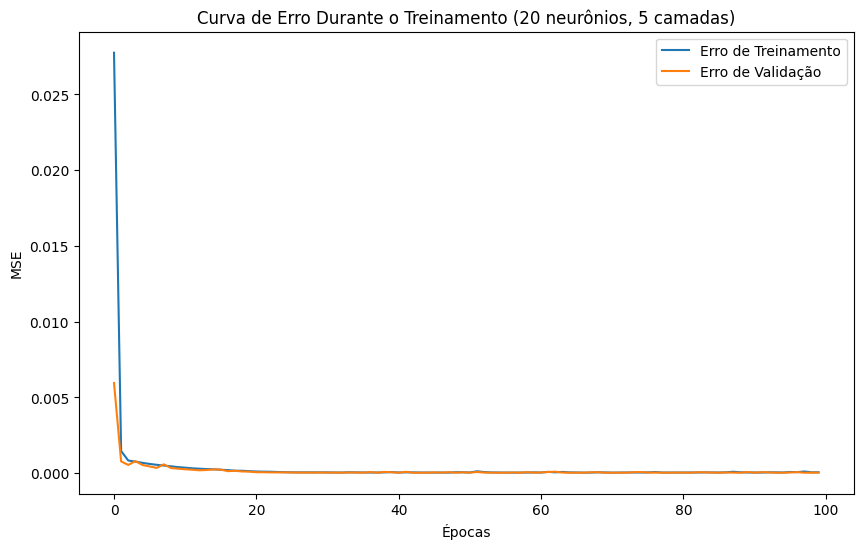

Testando com 60 neurônios em 5 camadas ocultas


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
    Métrica     Valor
0       MSE  0.000039
1       MAE  0.004557
2  R² Score  0.997714


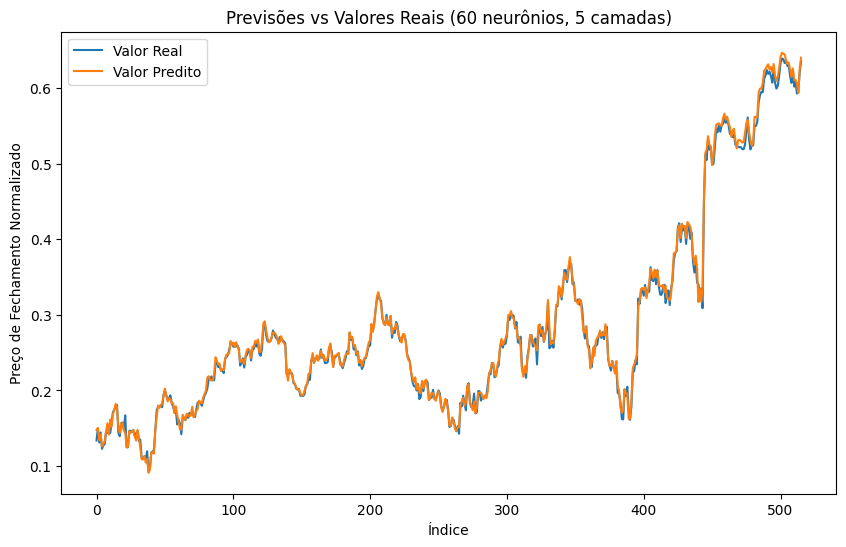

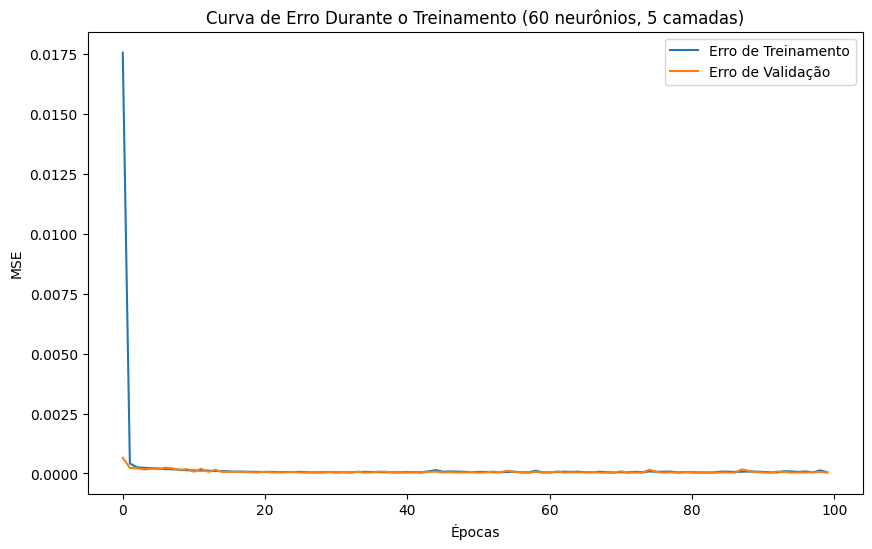

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

def criar_e_treinar_modelo(neuronios, camadas):
    print("=" * 37)
    print(f"Testando com {neuronios} neurônios em {camadas} camadas ocultas")
    print("=" * 37)

    model = Sequential()
    model.add(Dense(neuronios, input_dim=4, activation='tanh'))

    for _ in range(camadas - 1):
        model.add(Dense(neuronios, activation='tanh'))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(), loss='mean_squared_error')

    history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)

    # Previsões
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Exibir os resultados
    df_results = pd.DataFrame({
        'Métrica': ['MSE', 'MAE', 'R² Score'],
        'Valor': [mse, mae, r2]
    })
    print(df_results)

    # Gráfico de valores reais vs preditos
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Valor Real')
    plt.plot(y_pred, label='Valor Predito')
    plt.title(f'Previsões vs Valores Reais ({neuronios} neurônios, {camadas} camadas)')
    plt.xlabel('Índice')
    plt.ylabel('Preço de Fechamento Normalizado')
    plt.legend()
    plt.show()

    # Curva de erro durante o treinamento
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Erro de Treinamento')
    plt.plot(history.history['val_loss'], label='Erro de Validação')
    plt.title(f'Curva de Erro Durante o Treinamento ({neuronios} neurônios, {camadas} camadas)')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    return model

# Teste 1: Mais neurônios por camada (80 neurônios, 3 camadas)
modelo_mais_neuronios = criar_e_treinar_modelo(80, 3)

# Teste 2: Mais camadas ocultas, menos neurônios por camada (20 neurônios, 5 camadas)
modelo_mais_camadas = criar_e_treinar_modelo(20, 5)

# Teste 3: Exatamente 5 camadas ocultas com 60 neurônios cada
modelo_5_camadas_60_neuronios = criar_e_treinar_modelo(60, 5)


O melhor resultado obtido foi utilizando **80 Neurônios em 3 Camadas Ocultas**.

Agora, vamos seguir para os testes de épocas.

## Épocas

<ipython-input-11-76cffc8f8344>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Teste com 50 épocas

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    Métrica     Valor
0       MSE  0.000041
1       MAE  0.004681
2  R² Score  0.997603


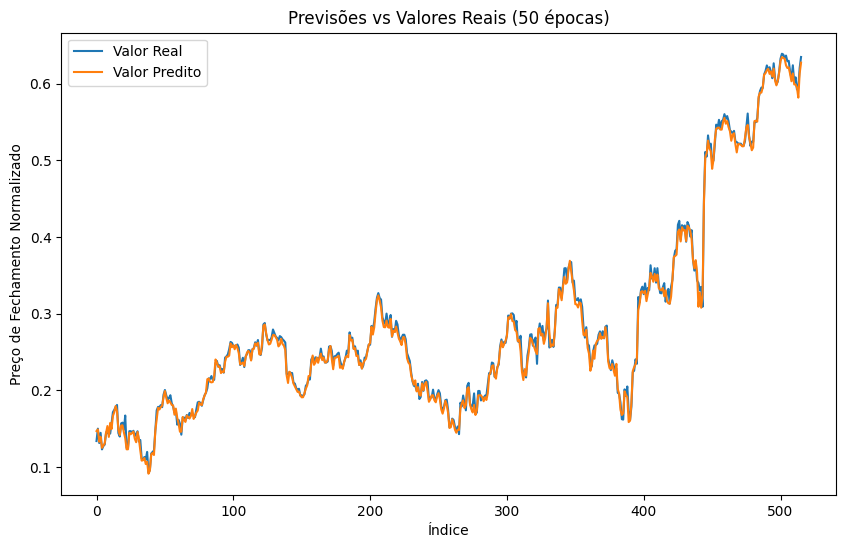

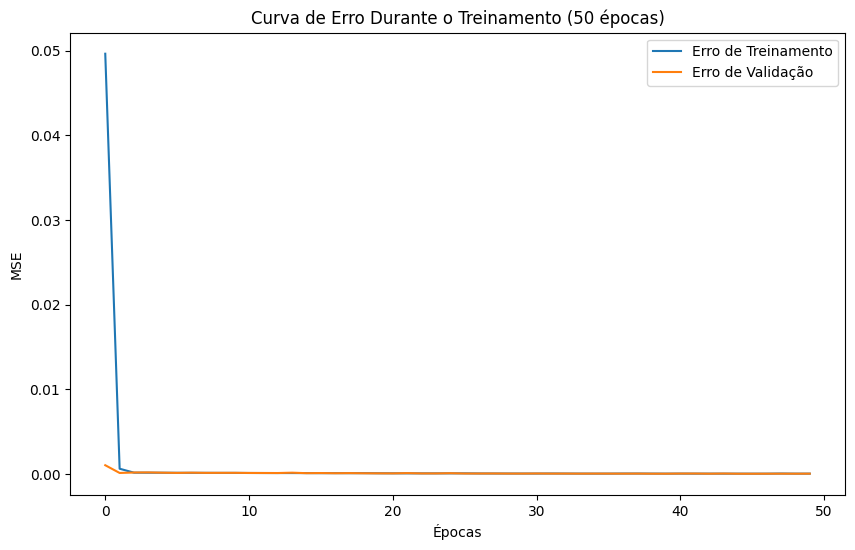

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Teste com 150 épocas

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    Métrica     Valor
0       MSE  0.000037
1       MAE  0.004399
2  R² Score  0.997842


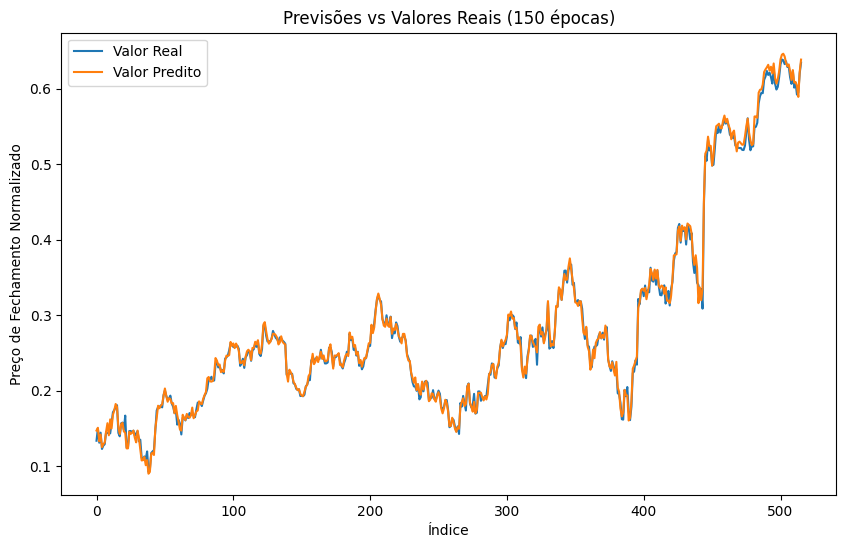

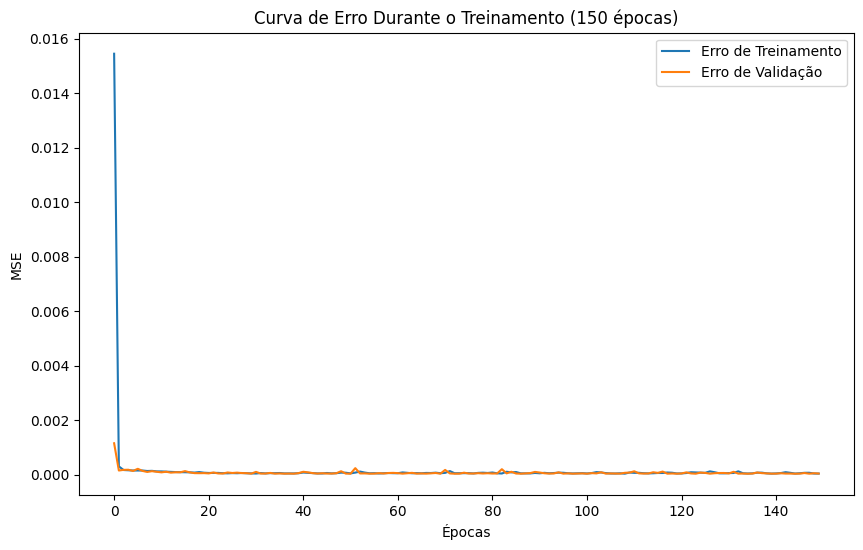

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Teste com 200 épocas

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
    Métrica     Valor
0       MSE  0.000030
1       MAE  0.003872
2  R² Score  0.998253


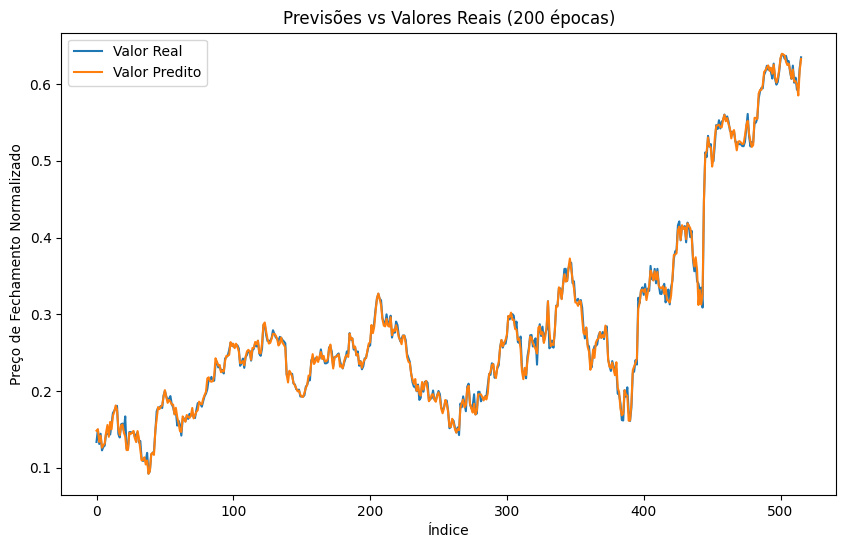

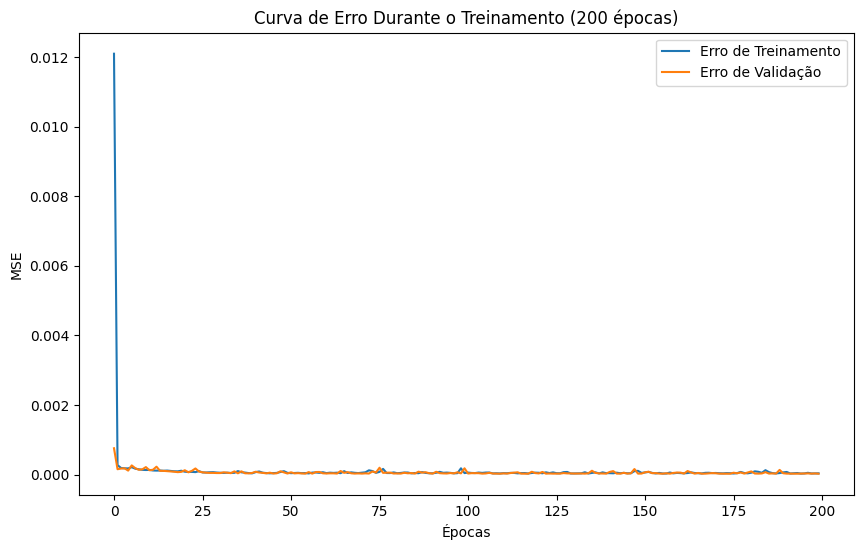

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

def train_and_evaluate(epochs):
    print(f"\n=======================\nTeste com {epochs} épocas\n=======================\n")

    # Criar o modelo MLP com ativação tanh
    model = Sequential([
        Dense(80, input_dim=4, activation='tanh'),
        Dense(80, activation='tanh'),
        Dense(80, activation='tanh'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(), loss='mean_squared_error')

    # Treinar o modelo
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=50, validation_data=(X_test, y_test), verbose=0)

    # Previsões
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Exibir os resultados em tabela
    df_results = pd.DataFrame({
        'Métrica': ['MSE', 'MAE', 'R² Score'],
        'Valor': [mse, mae, r2]
    })
    print(df_results)

    # Gráfico de valores reais vs preditos
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Valor Real')
    plt.plot(y_pred, label='Valor Predito')
    plt.title(f'Previsões vs Valores Reais ({epochs} épocas)')
    plt.xlabel('Índice')
    plt.ylabel('Preço de Fechamento Normalizado')
    plt.legend()
    plt.show()

    # Curva de erro durante o treinamento
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Erro de Treinamento')
    plt.plot(history.history['val_loss'], label='Erro de Validação')
    plt.title(f'Curva de Erro Durante o Treinamento ({epochs} épocas)')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # Salvar o modelo
    model.save(f"mlp_gold_price_model_{epochs}.h5")

# Executar testes com diferentes números de épocas
for epochs in [50, 100, 150, 200]:
    train_and_evaluate(epochs)


O melhor resultado obtido foi utilizando um treinamento com **200 épocas**.

Agora, vamos testando com outros algoritmos de treinamento.

## Algoritmos de Treinamento

<ipython-input-12-dca44e07b50c>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testando com Adam
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    Métrica     Valor
0       MSE  0.000047
1       MAE  0.005141
2  R² Score  0.997233


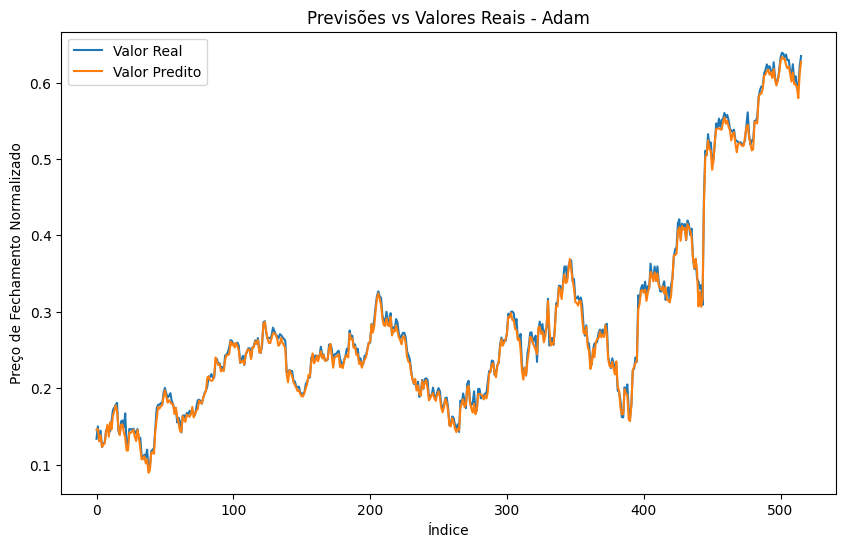

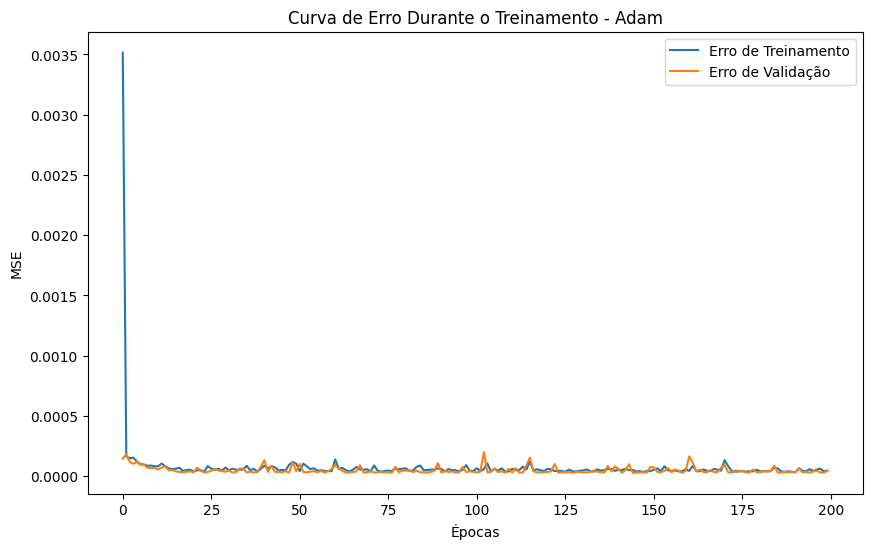

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testando com SGD
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
    Métrica     Valor
0       MSE  0.000227
1       MAE  0.010374
2  R² Score  0.986605


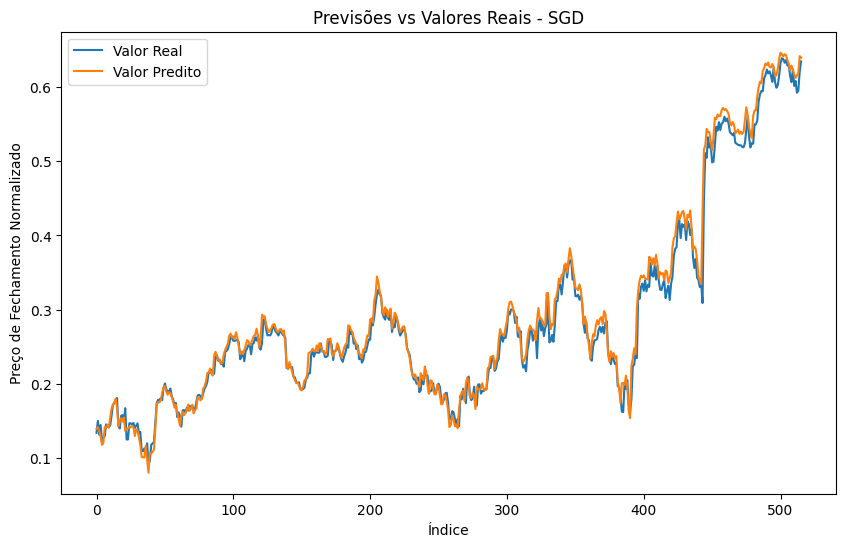

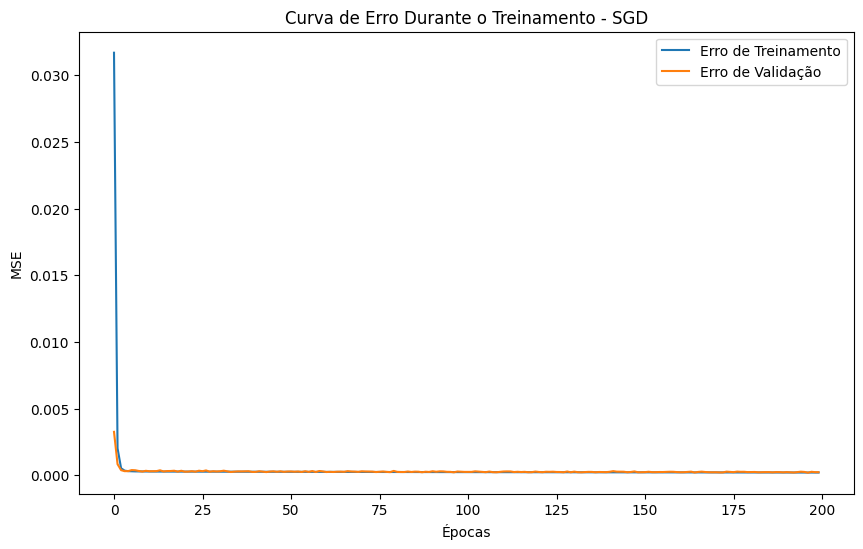

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testando com RMSprop
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    Métrica     Valor
0       MSE  0.000377
1       MAE  0.016232
2  R² Score  0.977767


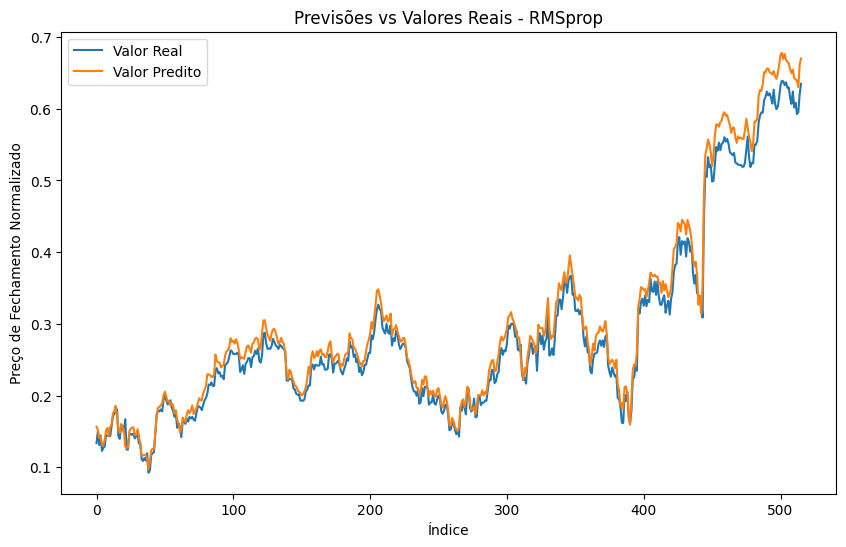

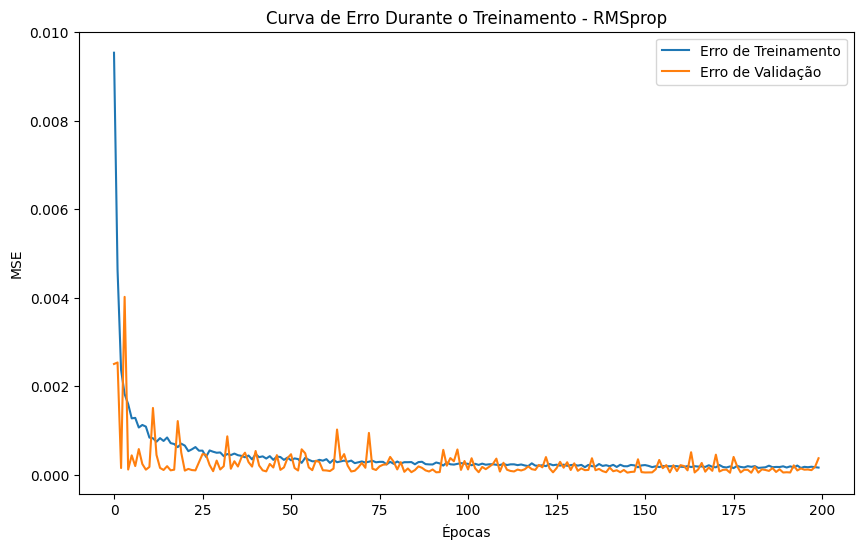

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Testar diferentes otimizadores
optimizers = {'Adam': Adam(), 'SGD': SGD(), 'RMSprop': RMSprop()}

for name, optimizer in optimizers.items():
    print(f'========================')
    print(f'Testando com {name}')
    print(f'========================')

    # Criar o modelo
    model = Sequential([
        Dense(80, input_dim=4, activation='tanh'),
        Dense(80, activation='tanh'),
        Dense(80, activation='tanh'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Treinar o modelo
    history = model.fit(X_train, y_train, epochs=200, batch_size=50, validation_data=(X_test, y_test), verbose=0)

    # Previsões
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Exibir os resultados em tabela
    df_results = pd.DataFrame({
        'Métrica': ['MSE', 'MAE', 'R² Score'],
        'Valor': [mse, mae, r2]
    })
    print(df_results)

    # Gráfico de valores reais vs preditos
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Valor Real')
    plt.plot(y_pred, label='Valor Predito')
    plt.title(f'Previsões vs Valores Reais - {name}')
    plt.xlabel('Índice')
    plt.ylabel('Preço de Fechamento Normalizado')
    plt.legend()
    plt.show()

    # Curva de erro durante o treinamento
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Erro de Treinamento')
    plt.plot(history.history['val_loss'], label='Erro de Validação')
    plt.title(f'Curva de Erro Durante o Treinamento - {name}')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # Salvar o modelo
    model.save(f'mlp_gold_price_model_{name.lower()}.h5')


## Análise do Dataset

<ipython-input-1-d56fbf9cadea>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)



Primeiras linhas do dataset:
        Date  Close/Last    Open    High     Low    Volume Change %
0 2022-12-30      1826.2  1821.8  1832.4  1819.8  107500.0    0.01%
1 2022-12-29      1826.0  1812.3  1827.3  1811.2  105990.0    0.56%
2 2022-12-28      1815.8  1822.4  1822.8  1804.2  118080.0   -0.40%
3 2022-12-27      1823.1  1808.2  1841.9  1808.0  159620.0    0.74%
5 2022-12-23      1804.2  1801.0  1812.2  1798.9  105460.0    0.50%


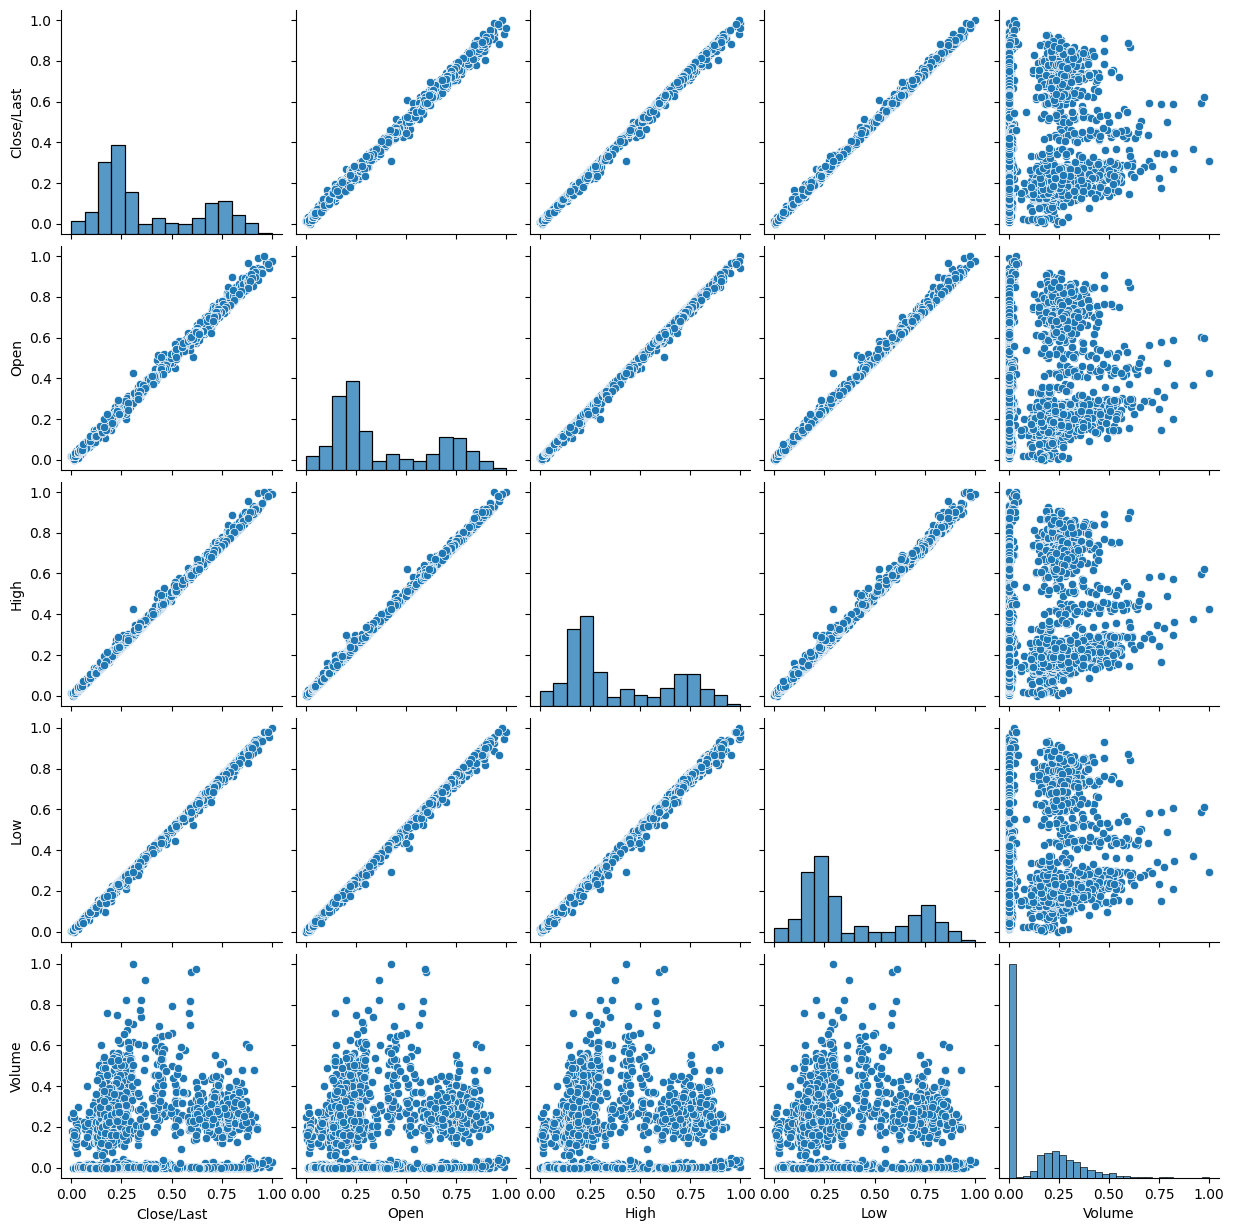

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Exemplo de previsões:
Real: 0.1337, Previsto: 0.1488
Real: 0.1499, Previsto: 0.1485
Real: 0.1311, Previsto: 0.1337
Real: 0.1444, Previsto: 0.1389
Real: 0.1228, Previsto: 0.1269
    Métrica     Valor
0       MSE  0.000034
1       MAE  0.004293
2  R² Score  0.997979


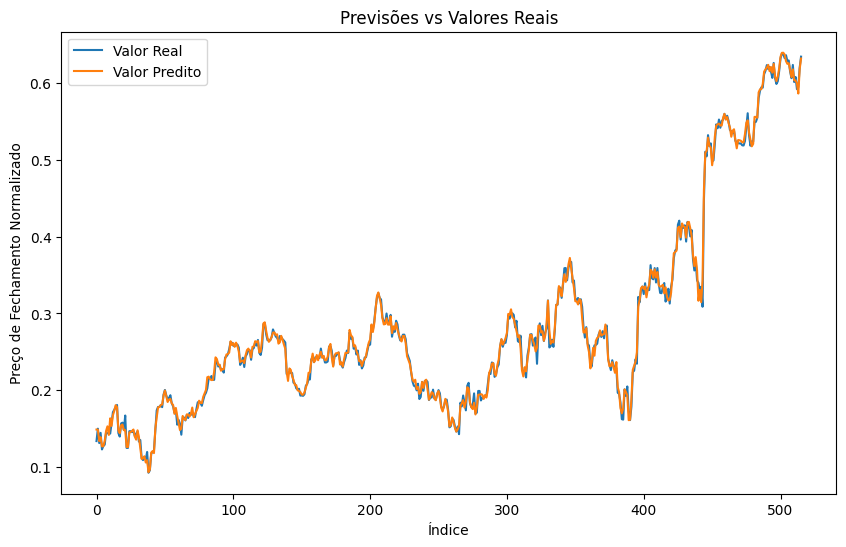

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Carregar o dataset
df = pd.read_csv('/content/Gold Price (2013-2023).csv')
df.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'], inplace=True)

def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1_000_000
        else:
            return float(value.replace(',', ''))
    return value

# Converter colunas numéricas
df[['Open', 'High', 'Low', 'Vol.']] = df[['Open', 'High', 'Low', 'Vol.']].applymap(convert_to_float)
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Renomear colunas
df.rename(columns={'Date': 'Date', 'Price': 'Close/Last', 'Vol.': 'Volume'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Exibir as primeiras linhas do dataset
print("\nPrimeiras linhas do dataset:")
print(df.head())

# Normalização
scaler = MinMaxScaler()
df[['Close/Last', 'Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])

# Criar o pairplot
sns.pairplot(df[['Close/Last', 'Open', 'High', 'Low', 'Volume']])
plt.show()

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close/Last'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar o modelo MLP
model = Sequential([
    Dense(40, input_dim=4, activation='relu'),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)

# Previsões
y_pred = model.predict(X_test)

# Exibir previsões
print("\nExemplo de previsões:")
for i in range(5):
    print(f"Real: {y_test[i]:.4f}, Previsto: {y_pred[i][0]:.4f}")

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados em tabela
df_results = pd.DataFrame({
    'Métrica': ['MSE', 'MAE', 'R² Score'],
    'Valor': [mse, mae, r2]
})
print(df_results)

# Gráfico de valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Valor Predito')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

# Salvar o modelo
model.save("mlp_gold_price_model.h5")
